# Protein Folding Principles Dataset

In [ ]:
import matplotlib.pyplot as plt

In [1]:
#Change root directory to the project root
#This is necessary to import modules from the project
#without having to install them

import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
## Interactive reloading
#This is useful for Jupyter notebooks to automatically reload modules

%load_ext autoreload
%autoreload 2

### Get PDB codes for high quality structures using PISCES

In [29]:
from dataset.pisces import fetch_pisces_table, get_filtered_pdb_codes

# Fetch and filter
pisces_df = fetch_pisces_table()
pdb_ids = get_filtered_pdb_codes(pisces_df)

# Preview results
print(f"Found {len(pdb_ids)} high-quality structures with pdb codes.")
print(pdb_ids[:10])


Detected PISCES columns: ['PDBchain', 'len', 'method', 'resol', 'rfac', 'freerfac']
Found 11116 high-quality structures with pdb codes.
['5D8V', '5NW3', '1UCS', '3X2M', '2VB1', '1US0', '6E6O', '6S2M', '1R6J', '4REK']


### Find beta-beta patterns and their chirality in PDB entries

In [ ]:
from dataset.io_utils import fetch_mmcif_file, run_dssp_on_mmcif
from dataset.motif_logic import detect_hairpins_and_chirality, detect_hairpins_and_chirality_backbone
import pandas as pd
import os

#pdb_ids = ["8GBS", "7R1C"]
pdb_ids = pdb_ids[0:2000]
results = []

for pdb_id in pdb_ids:
    pdb_path = fetch_mmcif_file(pdb_id)
    try:
        model, dssp_df = run_dssp_on_mmcif(pdb_path, dssp_exe="/opt/anaconda3/envs/folding-dssp/bin/mkdssp")
        if dssp_df is None:
            print(f"DSSP failed for {pdb_id}. Skipping.")
            continue
        hp_df = detect_hairpins_and_chirality_backbone(model, dssp_df)
        results.append(hp_df)
    finally:
        # Always remove the file, even if DSSP or parsing fails
        if os.path.exists(pdb_path):
            os.remove(pdb_path)

all_hairpins = pd.concat(results, ignore_index=True)
all_hairpins.head(10)

<Axes: title={'center': 'β‑hairpin loop length vs chirality'}, xlabel='Loop length', ylabel='Count'>

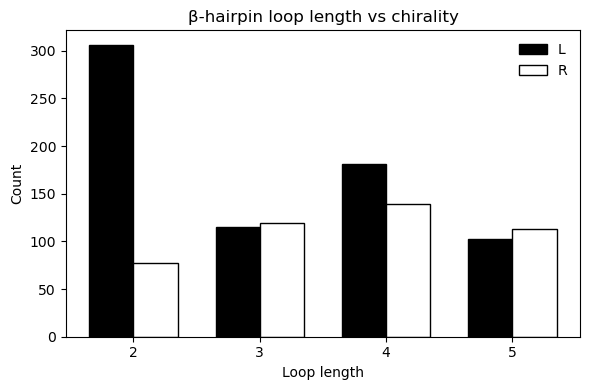

In [ ]:
from dataset.plots import plot_loop_length_chirality

plot_loop_length_chirality(all_hairpins)      # uses default loop lengths 2‑5


In [ ]:
from dataset.io_utils import fetch_mmcif_file, run_dssp_on_mmcif
from dataset.motif_logic import detect_hairpins_and_chirality, detect_hairpins_and_chirality_backbone
import pandas as pd
import os

#pdb_ids = ["8GBS", "7R1C"]
pdb_ids = pdb_ids[0:2000]
results = []

for pdb_id in pdb_ids:
    pdb_path = fetch_mmcif_file(pdb_id)
    try:
        model, dssp_df = run_dssp_on_mmcif(pdb_path, dssp_exe="/opt/anaconda3/envs/folding-dssp/bin/mkdssp")
        if dssp_df is None:
            print(f"DSSP failed for {pdb_id}. Skipping.")
            continue
        hp_df = detect_hairpins_and_chirality(model, dssp_df)
        results.append(hp_df)
    finally:
        # Always remove the file, even if DSSP or parsing fails
        if os.path.exists(pdb_path):
            os.remove(pdb_path)

all_hairpins = pd.concat(results, ignore_index=True)
all_hairpins.head(10)

,PDB,Chain,strand1_start,strand1_end,strand2_start,strand2_end,loop_len,handedness,handedness_magnitude,FullChainSequence,HairpinSequence,LoopSequence
0,5d8v,A,46,47,49,55,1,L,-0.226841,AAPANAVTADDPTAIALKYNQDATKSERVAAARPGLPPEEQHCANC...,CQFMQANVGE,F
1,5d8v,A,49,55,58,61,2,L,-0.250730,AAPANAVTADDPTAIALKYNQDATKSERVAAARPGLPPEEQHCANC...,MQANVGEGDWKGC,GD
2,5d8v,A,58,61,68,70,6,L,-0.251390,AAPANAVTADDPTAIALKYNQDATKSERVAAARPGLPPEEQHCANC...,WKGCQLFPGKLIN,QLFPGK
3,5d8v,A,68,70,74,75,3,L,-0.707118,AAPANAVTADDPTAIALKYNQDATKSERVAAARPGLPPEEQHCANC...,LINVNGWC,VNG
4,5d8v,A,74,75,80,81,4,L,-0.865696,AAPANAVTADDPTAIALKYNQDATKSERVAAARPGLPPEEQHCANC...,WCASWTLK,ASWT
5,5nw3,A,2,5,11,13,5,L,-0.143099,MAKWVCKICGYIYDEDAGDPDNGISPGTKFEELPDDWVCPICGAPK...,KWVCKICGYIYD,KICGY
6,5nw3,A,11,13,18,19,4,L,-0.917436,MAKWVCKICGYIYDEDAGDPDNGISPGTKFEELPDDWVCPICGAPK...,IYDEDAGDP,EDAG
7,5nw3,A,18,19,23,24,3,R,0.842288,MAKWVCKICGYIYDEDAGDPDNGISPGTKFEELPDDWVCPICGAPK...,DPDNGIS,DNG
8,5nw3,A,23,24,37,38,12,L,-0.173234,MAKWVCKICGYIYDEDAGDPDNGISPGTKFEELPDDWVCPICGAPK...,ISPGTKFEELPDDWVC,PGTKFEELPDDW
9,5nw3,A,37,38,44,45,5,R,0.513473,MAKWVCKICGYIYDEDAGDPDNGISPGTKFEELPDDWVCPICGAPK...,VCPICGAPK,PICGA


<Axes: title={'center': 'β‑hairpin loop length vs chirality'}, xlabel='Loop length', ylabel='Count'>

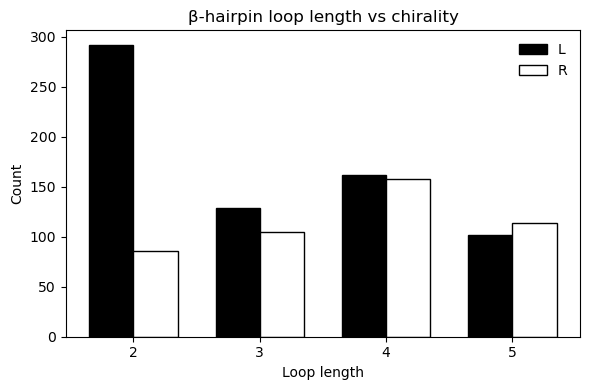

In [ ]:
plot_loop_length_chirality(all_hairpins)      # uses default loop lengths 2‑5
